<br><br><br><br><br>

# Numpy skills

<br><br><br><br><br>

<br><br><br><br><br>

Apart from Python itself, Numpy is the most basic part of the scientific ecosystem.

Although you can look up special functions as you need them, some things are good to have at the tips of your fingers.

(And as we've seen, these skills are transferrable to Pandas.)

<br><br><br><br><br>

In [59]:
# Basic data type in Numpy: the n-dimensional array.

import numpy

a = numpy.array([2**30, 2**30 + 2**26, -1, 0, 2**30 + 2**24, 2**30 + 2**20], numpy.int32)
# a = a.view(numpy.float32)
# a = a.reshape((2, 3))

print("data:\n", a, end="\n\n")
print("type:", type(a), end="\n\n")
print("dtype (type of the data it contains):", a.dtype, end="\n\n")
print("shape: (size of each dimension):", a.shape, end="\n\n")

data:
 [1073741824 1140850688         -1          0 1090519040 1074790400]

type: <class 'numpy.ndarray'>

dtype (type of the data it contains): int32

shape: (size of each dimension): (6,)



In [3]:
# Basic function type in Numpy: the universal function or "ufunc".

print("func:", numpy.sqrt)
print("type:", type(numpy.sqrt))

with numpy.errstate(invalid="ignore"):    # to silently let sqrt(-1) → nan
    b = numpy.sqrt(a)                     # call the ufunc!

print()
for ai, bi in zip(a, b):
    print("{:12.1f}      \u2192 {:12.1f}".format(ai, bi))

func: <ufunc 'sqrt'>
type: <class 'numpy.ufunc'>

1073741824.0      →      32768.0
1140850688.0      →      33776.5
        -1.0      →          nan
         0.0      →          0.0
1090519040.0      →      33023.0
1074790400.0      →      32784.0


In [38]:
# Even operations like +, -, *, / are ufuncs.

class CatchUFunc:
    def __init__(self, array):
        self.array = array

    # The following method overrides ufuncs, just to show what's being called. It's an ADVANCED topic.
    def __array_ufunc__(self, ufunc, method, *inputs, **kwargs):
        inputs = [x.array if isinstance(x, CatchUFunc) else x for x in inputs]
        print("{}.{} is being called on{}\nwith keyword arguments {}".format(
            ufunc, method, "".join("\n    " + str(x) for x in inputs), kwargs))
        return getattr(ufunc, method)(*inputs, **kwargs)

a = numpy.array([3.14, 2.71, 999.9])
b = CatchUFunc(numpy.array([1.1, 2.2, 3.3]))

a + b

<ufunc 'add'>.__call__ is being called on
    [  3.14   2.71 999.9 ]
    [1.1 2.2 3.3]
with keyword arguments {}


array([   4.24,    4.91, 1003.2 ])

<br><br><br>

**If you're working with a ufunc,**

   * your input arrays (1 or more) must have the same `shape`;
   * your output array (only 1) will have the same `shape`;
   * a simple function is applied to each element, index for index (`out[i] = f(in[i])`);
   * you don't know the order in which they're applied, or if some are applied simultaneously (vectorized).

Numpy has other functions that do more complex things, but they are not ufuncs.

<br><br><br>

<br><br><br><br><br>

### Slicing Numpy arrays

<br><br><br><br><br>

In [52]:
# Basic array slicing is the same as Python list slicing

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

for expr in "a[3]      ", "a[3:]     ", "a[:3]     ", "a[3:7]    ", "a[3:7:2]  ", "a[::2]    ":
    print(expr, "=", eval(expr))

print()
for expr in "a[-3]     ", "a[-3:]    ", "a[:-3]    ", "a[-7:-3]  ", "a[-7:-3:2]", "a[::-1]   ":
    print(expr, "=", eval(expr))

a[3]       = 3.3
a[3:]      = [3.3 4.4 5.5 6.6 7.7 8.8 9.9]
a[:3]      = [0.  1.1 2.2]
a[3:7]     = [3.3 4.4 5.5 6.6]
a[3:7:2]   = [3.3 5.5]
a[::2]     = [0.  2.2 4.4 6.6 8.8]

a[-3]      = 7.7
a[-3:]     = [7.7 8.8 9.9]
a[:-3]     = [0.  1.1 2.2 3.3 4.4 5.5 6.6]
a[-7:-3]   = [3.3 4.4 5.5 6.6]
a[-7:-3:2] = [3.3 5.5]
a[::-1]    = [9.9 8.8 7.7 6.6 5.5 4.4 3.3 2.2 1.1 0. ]


In [68]:
# But multidimensional arrays can be sliced with an extension of this syntax.
a = numpy.array([[ 0,  1,  2,  3,  4,  5],
                 [10, 11, 12, 13, 14, 15],
                 [20, 21, 22, 23, 24, 25],
                 [30, 31, 32, 33, 34, 35]])
for expr in "a[2:, 1:]", "a[:, 1:-1]", "a[::2, ::2]", "a[:, 3]":
    print(expr, " =\n", eval(expr), sep="", end="\n\n")

a[2:, 1:] =
[[21 22 23 24 25]
 [31 32 33 34 35]]

a[:, 1:-1] =
[[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]

a[::2, ::2] =
[[ 0  2  4]
 [20 22 24]]

a[:, 3] =
[ 3 13 23 33]



In [95]:
# Exercise: slice "a" so that it is identical to "b"

a = numpy.arange(30).reshape((3, 2, 5))
b = numpy.array([[4, 9], [24, 29]])

asliced = a   # a[?, ?, ?]

print("a[?, ?, ?] =", asliced, sep="\n", end="\n\n")
print("b =", b, sep="\n")

a[?, ?, ?] =
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]]

b =
[[ 4  9]
 [24 29]]


In [99]:
# Numpy indexing goes beyond integers and slices; you can use arrays to index arrays.

a    = numpy.array([  0.0,   1.1,   2.2,   3.3,   4.4,  5.5,   6.6,  7.7,   8.8,  9.9])
mask = numpy.array([False, False, False, False, False, True, False, True, False, True])
#                                                       5.5          7.7          9.9

for expr in "a[mask]", "a < 5", "a[a < 5]":
    print(expr, " =\n", eval(expr), sep="", end="\n\n")

a[mask] =
[5.5 7.7 9.9]

a < 5 =
[ True  True  True  True  True False False False False False]

a[a < 5] =
[0.  1.1 2.2 3.3 4.4]



In [112]:
# This is particularly useful for selecting one array using criteria derived from another.

tavg = numpy.loadtxt("data/newark-temperature-tavg.txt")
tmin = numpy.loadtxt("data/newark-temperature-tmin.txt")
tmax = numpy.loadtxt("data/newark-temperature-tmax.txt")

mask = numpy.isnan(tavg)
print("mask    =", mask)

imputed = (tmin[mask] + tmax[mask]) / 2
print("imputed = ", imputed)

# Careful! Masking an array changes its size!
print()
print("len(tavg)", len(tavg), "len(imputed)", len(imputed))

mask    = [ True  True  True ... False False False]
imputed =  [39.  38.5 24.5 ... 49.5 47.  43.5]

len(tavg) 42019 len(imputed) 37301


In [113]:
# Indexing, including advanced indexing, can be used to ASSIGN to arrays as well.
print("Assigning a single item:\ntavg[0] before =", tavg[0])
tavg[0] = imputed[0]
print("tavg[0] after  =", tavg[0])

print("\nAssigning to a sliced section of the array:\ntavg[:10] before =", tavg[:10])
tavg[:10] = imputed[:10]
print("tavg[:10] after  =", tavg[:10])

print("\nAssigning to a masked section of the array:\ntavg before =", tavg)
tavg[mask] = imputed
print("tavg after  =", tavg)

Assigning a single item:
tavg[0] before = nan
tavg[0] after  = 39.0

Assigning to a sliced section of the array:
tavg[:10] before = [39. nan nan nan nan nan nan nan nan nan]
tavg[:10] after  = [39.  38.5 24.5 18.  22.  21.5 20.  21.5 21.5 18. ]

Assigning to a masked section of the array:
tavg before = [39.  38.5 24.5 ... 68.  59.  47. ]
tavg after  = [39.  38.5 24.5 ... 68.  59.  47. ]


In [148]:
# Exercise: suppose you only want to impute average temperatures if the max-min difference is not big.
# Fill in the last line to make that happen. Printing lengths and error messages are your friends.

tavg = numpy.loadtxt("data/newark-temperature-tavg.txt")
tmin = numpy.loadtxt("data/newark-temperature-tmin.txt")
tmax = numpy.loadtxt("data/newark-temperature-tmax.txt")

mask1 = numpy.isnan(tavg)                                # only impute missing average temperatures
mask2 = ~(numpy.isnan(tmax) | numpy.isnan(tmin))         # "nan < 20" is invalid, so mask that, too
mask3 = (mask1 & mask2)                                  # apply both conditions to all rows
mask4 = (tmax[mask3] - tmin[mask3] < 20)                 # compute "tmax - tmin < 20" only where needed

imputed = (tmin[mask3][mask4] + tmax[mask3][mask4]) / 2  # yikes! mask of mask?

print("; ".join("{} = {}".format(expr, eval(expr))
               for expr in ("len(mask1)", "len(mask2)", "len(mask3)", "len(mask4)", "len(imputed)")))

# tavg[???] = imputed[???]      # what should go here?
# tavg

len(mask1) = 42019; len(mask2) = 42019; len(mask3) = 42019; len(mask4) = 37120; len(imputed) = 24284


In [157]:
# The real lesson of that previous exercise is that you should avoid maskings of maskings of maskings.

# Skipping extra mathematical calculations, as you would in for loops with "continue" statements,
# is usually counter-productive in vectorized calculations (both ease-of-use AND performance).

tavg = numpy.loadtxt("data/newark-temperature-tavg.txt")
tmin = numpy.loadtxt("data/newark-temperature-tmin.txt")
tmax = numpy.loadtxt("data/newark-temperature-tmax.txt")

mask1 = numpy.isnan(tavg)                # only impute missing average temperatures
with numpy.errstate(invalid="ignore"):   # let "nan < 20" be ignored ("nan + anything" → False)
    mask2 = (tmax - tmin < 20)
mask3 = (mask1 & mask2)                  # everything we combine has the same size

imputed = (tmin + tmax) / 2              # compute for all rows: extra math is faster than new arrays!

print("; ".join("{} = {}".format(expr, eval(expr))
               for expr in ("len(mask1)", "len(mask2)", "len(mask3)", "len(imputed)")))

tavg[mask3] = imputed[mask3]             # same masks on both sides of the equation; easier to read
tavg

len(mask1) = 42019; len(mask2) = 42019; len(mask3) = 42019; len(imputed) = 42019


array([ nan, 38.5, 24.5, ..., 68. , 59. , 47. ])

In [164]:
# Arrays of integers can also be used as indexes.

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

print("selects elements, possibly out of order")
index = numpy.array([3, 5, 0, 9])
print("a[[3, 5, 0, 9]] =", a[index])

print("\nmay use negative indexing, just like single integers and slices")
index = numpy.array([3, 5, 0, -1, -2, -3])
print("a[[3, 5, 0, -1, -2, -3]] =", a[index])

print("\nmay include repetitions(!)")
index = numpy.array([3, 5, 0, 9, 9, 9, 3, 5, 0])
print("a[[3, 5, 0, 9, 9, 9, 3, 5, 0]] =", a[index])

selects elements, possibly out of order
a[[3, 5, 0, 9]] = [3.3 5.5 0.  9.9]

may use negative indexing, just like single integers and slices
a[[3, 5, 0, -1, -2, -3]] = [3.3 5.5 0.  9.9 8.8 7.7]

may include repetitions(!)
a[[3, 5, 0, 9, 9, 9, 3, 5, 0]] = [3.3 5.5 0.  9.9 9.9 9.9 3.3 5.5 0. ]


In [180]:
# Just as masking with booleans is a generalization of slicing...

def slice2mask(a, s):
    start, stop, step = s.indices(len(a))
    if step > 0:
        return numpy.array([start <= i < stop and (i - start) % step == 0 for i in range(len(a))])
    else:
        raise ValueError("masking is only a generalization of slices with positive steps")

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

s = slice(3, None, 2)   # equivalent to [3::2]

mask = slice2mask(a, s)

print("mask    =", mask)
print("a[s]    =", a[s])
print("a[mask] =", a[mask])

mask    = [False False False  True False  True False  True False  True]
a[s]    = [3.3 5.5 7.7 9.9]
a[mask] = [3.3 5.5 7.7 9.9]


In [181]:
# ...indexing with integers is a generalization of masking.

def mask2index(mask):
    return numpy.nonzero(mask)[0]

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

mask = [False, False, False, True, False, True, False, True, False, True]

index = mask2index(mask)

print("index    =", index)
print("a[mask]  =", a[mask])
print("a[index] =", a[index])

index    = [3 5 7 9]
a[mask]  = [3.3 5.5 7.7 9.9]
a[index] = [3.3 5.5 7.7 9.9]


In [208]:
# Also, indexing with integers is like composing functions of integers from 0 up to array length.

def f(x):
    return x**2 - 5*x + 10                              # some non-negative function

def g(y):
    return max(0, 2*y - 10) + 3                         # another non-negative function

F   = numpy.array([f(i) for i in numpy.arange(10)])     # sample f at 10 elements
G   = numpy.array([g(i) for i in numpy.arange(100)])    # sample g at enough elements to include max(f)
GoF = numpy.array([g(f(i)) for i in numpy.arange(10)])  # sample g∘f at 10 elements

print("G\u2218F =", G[F])
print("g\u2218f =", GoF)

G∘F = [13  5  3  3  5 13 25 41 61 85]
g∘f = [13  5  3  3  5 13 25 41 61 85]


In [277]:
# Application: consider this text corpous (removing punctuation).

text = """Four score and seven years ago our fathers brought forth on this continent, a new nation,
conceived in Liberty, and dedicated to the proposition that all men are created equal.

Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and
so dedicated, can long endure. We are met on a great battle-field of that war. We have come to
dedicate a portion of that field, as a final resting place for those who here gave their lives that
that nation might live. It is altogether fitting and proper that we should do this.

But, in a larger sense, we can not dedicate—we can not consecrate—we can not hallow—this ground. The
brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add
or detract. The world will little note, nor long remember what we say here, but it can never forget
what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which
they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the
great task remaining before us—that from these honored dead we take increased devotion to that cause
for which they gave the last full measure of devotion—that we here highly resolve that these dead
shall not have died in vain—that this nation, under God, shall have a new birth of freedom—and that
government of the people, by the people, for the people, shall not perish from the earth."""

words = text.replace(".", " ").replace(",", " ").replace("-", " ").replace("\u2014", " ").split()

In [276]:
# Dictionary encoding: for compression or textual analysis (e.g. with machine learning).

words = numpy.array(words)
dictionary, index = numpy.unique(words, return_inverse=True)

print("len(words) =", len(words), "\nwords[:25] =\n" + str(words[:25]))
print("\nlen(dictionary) =", len(dictionary), "\ndictionary[:25] =\n" + str(dictionary[:25]))
print("\nlen(index) =", len(index), "\nindex[:25] =\n" + str(index[:25]))

len(words) = 272 
words[:25] =
['Four' 'score' 'and' 'seven' 'years' 'ago' 'our' 'fathers' 'brought'
 'forth' 'on' 'this' 'continent' 'a' 'new' 'nation' 'conceived' 'in'
 'Liberty' 'and' 'dedicated' 'to' 'the' 'proposition' 'that']

len(dictionary) = 142 
dictionary[:25] =
['But' 'Four' 'God' 'It' 'Liberty' 'Now' 'The' 'We' 'a' 'above' 'add'
 'advanced' 'ago' 'all' 'altogether' 'and' 'any' 'are' 'as' 'battle' 'be'
 'before' 'birth' 'brave' 'brought']

len(index) = 272 
index[:25] =
[  1 109  15 111 141  12  94  49  24  55  92 124  34   8  86  84  31  69
   4  15  38 127 120 102 119]


In [278]:
# Restoring a text from its dictionary encoding is just an application of integer indexing.

# index             : positions in corpus → integer codes
# dictionary        : integer codes       → words
# dictionary[index] : positions in corpus → words

dictionary[index]

array(['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers',
       'brought', 'forth', 'on', 'this', 'continent', 'a', 'new',
       'nation', 'conceived', 'in', 'Liberty', 'and', 'dedicated', 'to',
       'the', 'proposition', 'that', 'all', 'men', 'are', 'created',
       'equal', 'Now', 'we', 'are', 'engaged', 'in', 'a', 'great',
       'civil', 'war', 'testing', 'whether', 'that', 'nation', 'or',
       'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated',
       'can', 'long', 'endure', 'We', 'are', 'met', 'on', 'a', 'great',
       'battle', 'field', 'of', 'that', 'war', 'We', 'have', 'come', 'to',
       'dedicate', 'a', 'portion', 'of', 'that', 'field', 'as', 'a',
       'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave',
       'their', 'lives', 'that', 'that', 'nation', 'might', 'live', 'It',
       'is', 'altogether', 'fitting', 'and', 'proper', 'that', 'we',
       'should', 'do', 'this', 'But', 'in', 'a', 'larger', 'sense', 'we',
     

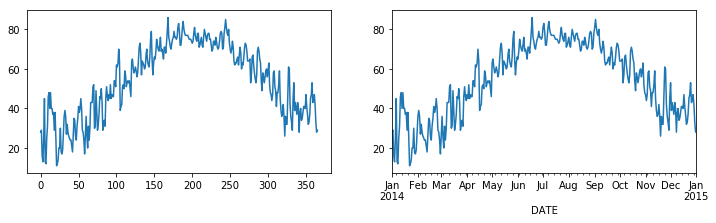

In [251]:
%matplotlib inline
import matplotlib.pyplot; matplotlib.pylab.rcParams["figure.figsize"] = 12, 3; matplotlib.pyplot.subplot(1, 2, 1)

# Arrays are explicitly specified functions whose domains are [0, number of items).
matplotlib.pyplot.plot(tavg[40250:40616])

import pandas; df = pandas.read_csv("data/newark-temperature.csv", parse_dates=["DATE"]); df.set_index(df["DATE"], inplace=True); matplotlib.pyplot.subplot(1, 2, 2)

# DataFrames are explicitly specified functions whose domains are their indexes.
df["TAVG"].loc[pandas.Timestamp("2014-01-01"):pandas.Timestamp("2015-01-01")].plot();

<br><br><br><br><br>

**To recap:**

   * **an integer** selects individual elements,
   * **a slice** selects a contiguous or regularly skipping subrange (can be backward),
   * **a boolean array** drops arbitrarily chosen elements, preserving order,
   * **an integer array** selects a function of elements: arbitrarily chosen, arbitrary order, may include duplicates.

<br><br><br><br><br>